# Clase #7

In [1]:
import sys
sys.dont_write_bytecode = True

import math
import numpy as np
import cv2 as cv
import lib.image_utils as ImgUtils
%matplotlib inline

import contextlib
with contextlib.redirect_stdout(None):
    np.seterr(divide = 'ignore')


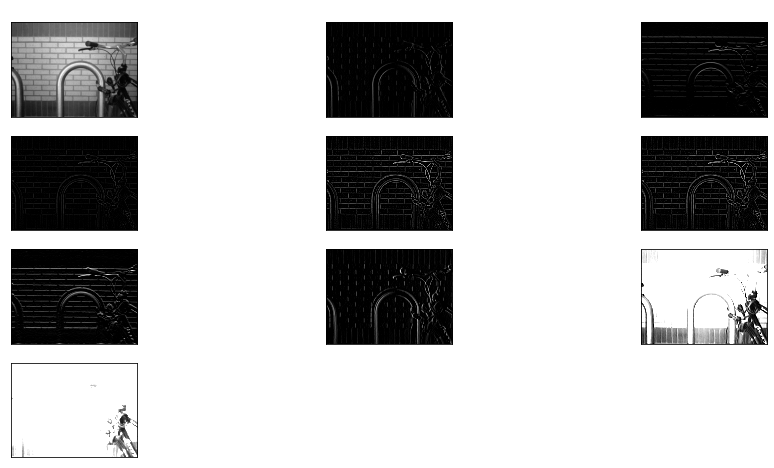

In [17]:
image = cv.imread('./images/im23.jpg', cv.IMREAD_GRAYSCALE)

g = lambda x, y: np.sqrt(x*x + y*y)

ImgUtils.imshow2(
    image,
    ImgUtils.transform(
        image,
        ImgUtils.create_kernel(value = [0, 0, 0, 0, -1, 1, 0, 0, 0]) * 3
    ),
    ImgUtils.transform(
        image,
        ImgUtils.create_kernel(value = [0, 0, 0, 0, -1, 0, 0, 1, 0]) * 3
    ),
    ImgUtils.transform(
        image,
        ImgUtils.create_kernel(value = [0, 1, 0, 1, -4, 1, 0, 1, 0]) * 3
    ),
    ImgUtils.transform(
        image,
        ImgUtils.create_kernel(value = [1, 1, 1, 1, -8, 1, 1, 1, 1]) * 3
    ),
    ImgUtils.transform(
        image,
        ImgUtils.create_kernel(value = [1, 1, 1, 1, -8, 1, 1, 1, 1]) * 3
    ),
    ImgUtils.transform(
        image,
        ImgUtils.create_kernel(value = [1, 1, 1, 0, 0, 0, -1, -1, -1])
    ),
    ImgUtils.transform(
        image,
        ImgUtils.create_kernel(value = [1, 0, -1, 1, 0, -1, 1, 0, -1])
    ),
    ImgUtils.transform(
        image,
        ImgUtils.create_kernel(
            value = np.arctan2(
                ImgUtils.create_kernel(value = [1, 0, -1, 1, 0, -1, 1, 0, -1]),
                ImgUtils.create_kernel(value = [1, 1, 1, 0, 0, 0, -1, -1, -1])
            )
        )
    ),
    ImgUtils.transform(
        image,
        ImgUtils.create_kernel(
            value = g(
                ImgUtils.create_kernel(value = [1, 0, -1, 1, 0, -1, 1, 0, -1]),
                ImgUtils.create_kernel(value = [1, 1, 1, 0, 0, 0, -1, -1, -1])
            )
        )
    ),
    titles = ['Original', '', '', '', '', '', 'Prewit (Vert)', 'Prewit (Horz)', 'Prewit (Dir. Grad.)', 'Prewit (atan)'],
    titleColor = "white"
)

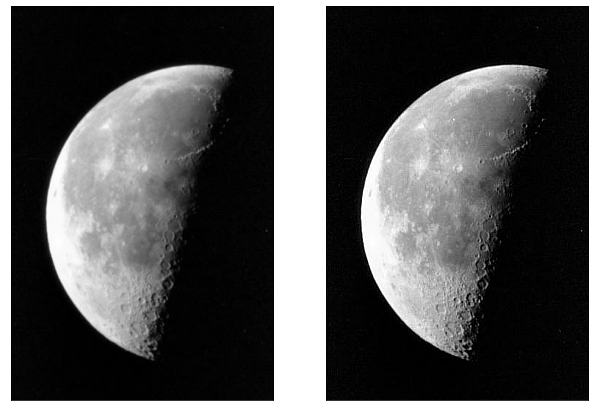

In [34]:
image2 = cv.imread('./images/im19.jpg', cv.IMREAD_GRAYSCALE)

LoG  = lambda x, y, alpha: (-1 / np.pi * alpha) * (1 - (x**2 + y**2) / 2 * alpha **2) * np.exp(-(x**2 + y**2) / 2 * alpha **2)

create_log_kernel = lambda size, alpha: np.array([LoG(x, y, alpha) for x in range(size) for y in range(size)]).reshape((size, size))

create_laplacian_kernel = lambda alpha: np.array([[alpha, 1-alpha, alpha], [1 - alpha, -4, 1 - alpha], [alpha, 1-alpha, alpha]]) * 1 / (1 + alpha)

ImgUtils.imshow2(
    image2,
    image2 - ImgUtils.transform(image2, create_laplacian_kernel(2)),
    # image2 - ImgUtils.transform(image2, create_log_kernel(3, 1.4)),
    # image2 + ImgUtils.transform(image2, create_log_kernel(3, .4))
)